Authors:
#### Bishoy George Bishoy.George.eg@gmail.com
#### Farah Mohamad
#### Omar Ahmed Shihi
#### Toka Abd El Ghafar

# Import necessary libraries

In [ ]:
import tensorflow as tf
import matplotlib.image as img
%matplotlib inline
import numpy as np
from collections import defaultdict
import collections
from shutil import copy
from shutil import copytree, rmtree
import tensorflow as tfs
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import os
import random
from collections import Counter
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint

# Download and extract the data

In [ ]:
import os
# Helper function to download data and extract
def get_data_extract():
  if "food-101" in os.listdir():
    print("Dataset already exists")
  else:
    print("Downloading the data...")
    !wget http://data.vision.ee.ethz.ch/cvl/food-101.tar.gz  #to go and download
    print("Dataset downloaded!")
    print("Extracting data..")
    !tar xzvf food-101.tar.gz                                #to unzip and save to a directory
    print("Extraction done!")

In [ ]:
get_data_extract()

Dataset already exists


In [ ]:
# Check the extracted dataset folder
!ls food-101/

images	license_agreement.txt  meta  README.txt


# Explore the data

In [ ]:
os.listdir('food-101/images')

['baklava',
 'french_onion_soup',
 'onion_rings',
 'hot_dog',
 'cup_cakes',
 'grilled_salmon',
 'pork_chop',
 'edamame',
 'pizza',
 'apple_pie',
 'donuts',
 'fried_calamari',
 'tacos',
 'ice_cream',
 'creme_brulee',
 'grilled_cheese_sandwich',
 'huevos_rancheros',
 'lasagna',
 'club_sandwich',
 'eggs_benedict',
 'bruschetta',
 'french_fries',
 'filet_mignon',
 'chocolate_cake',
 'gnocchi',
 'chocolate_mousse',
 'strawberry_shortcake',
 'cheese_plate',
 'ramen',
 'spaghetti_bolognese',
 'bibimbap',
 'beet_salad',
 'gyoza',
 'frozen_yogurt',
 'pad_thai',
 'lobster_roll_sandwich',
 'dumplings',
 'omelette',
 'beef_tartare',
 'chicken_quesadilla',
 'deviled_eggs',
 'french_toast',
 'churros',
 'tuna_tartare',
 'peking_duck',
 'spring_rolls',
 'prime_rib',
 'bread_pudding',
 'seaweed_salad',
 'samosa',
 'hummus',
 'paella',
 'chicken_wings',
 'poutine',
 'spaghetti_carbonara',
 'clam_chowder',
 'garlic_bread',
 'ravioli',
 'takoyaki',
 'lobster_bisque',
 'baby_back_ribs',
 'fried_rice',
 'g

In [ ]:
os.listdir('food-101/meta')

['test.txt',
 'train.txt',
 'classes.txt',
 'labels.txt',
 'test.json',
 'train.json']

In [ ]:
!head food-101/meta/train.txt

apple_pie/1005649
apple_pie/1014775
apple_pie/1026328
apple_pie/1028787
apple_pie/1043283
apple_pie/1050519
apple_pie/1057749
apple_pie/1057810
apple_pie/1072416
apple_pie/1074856


In [ ]:
!head food-101/meta/classes.txt

apple_pie
baby_back_ribs
baklava
beef_carpaccio
beef_tartare
beet_salad
beignets
bibimbap
bread_pudding
breakfast_burrito


# Visualize the data

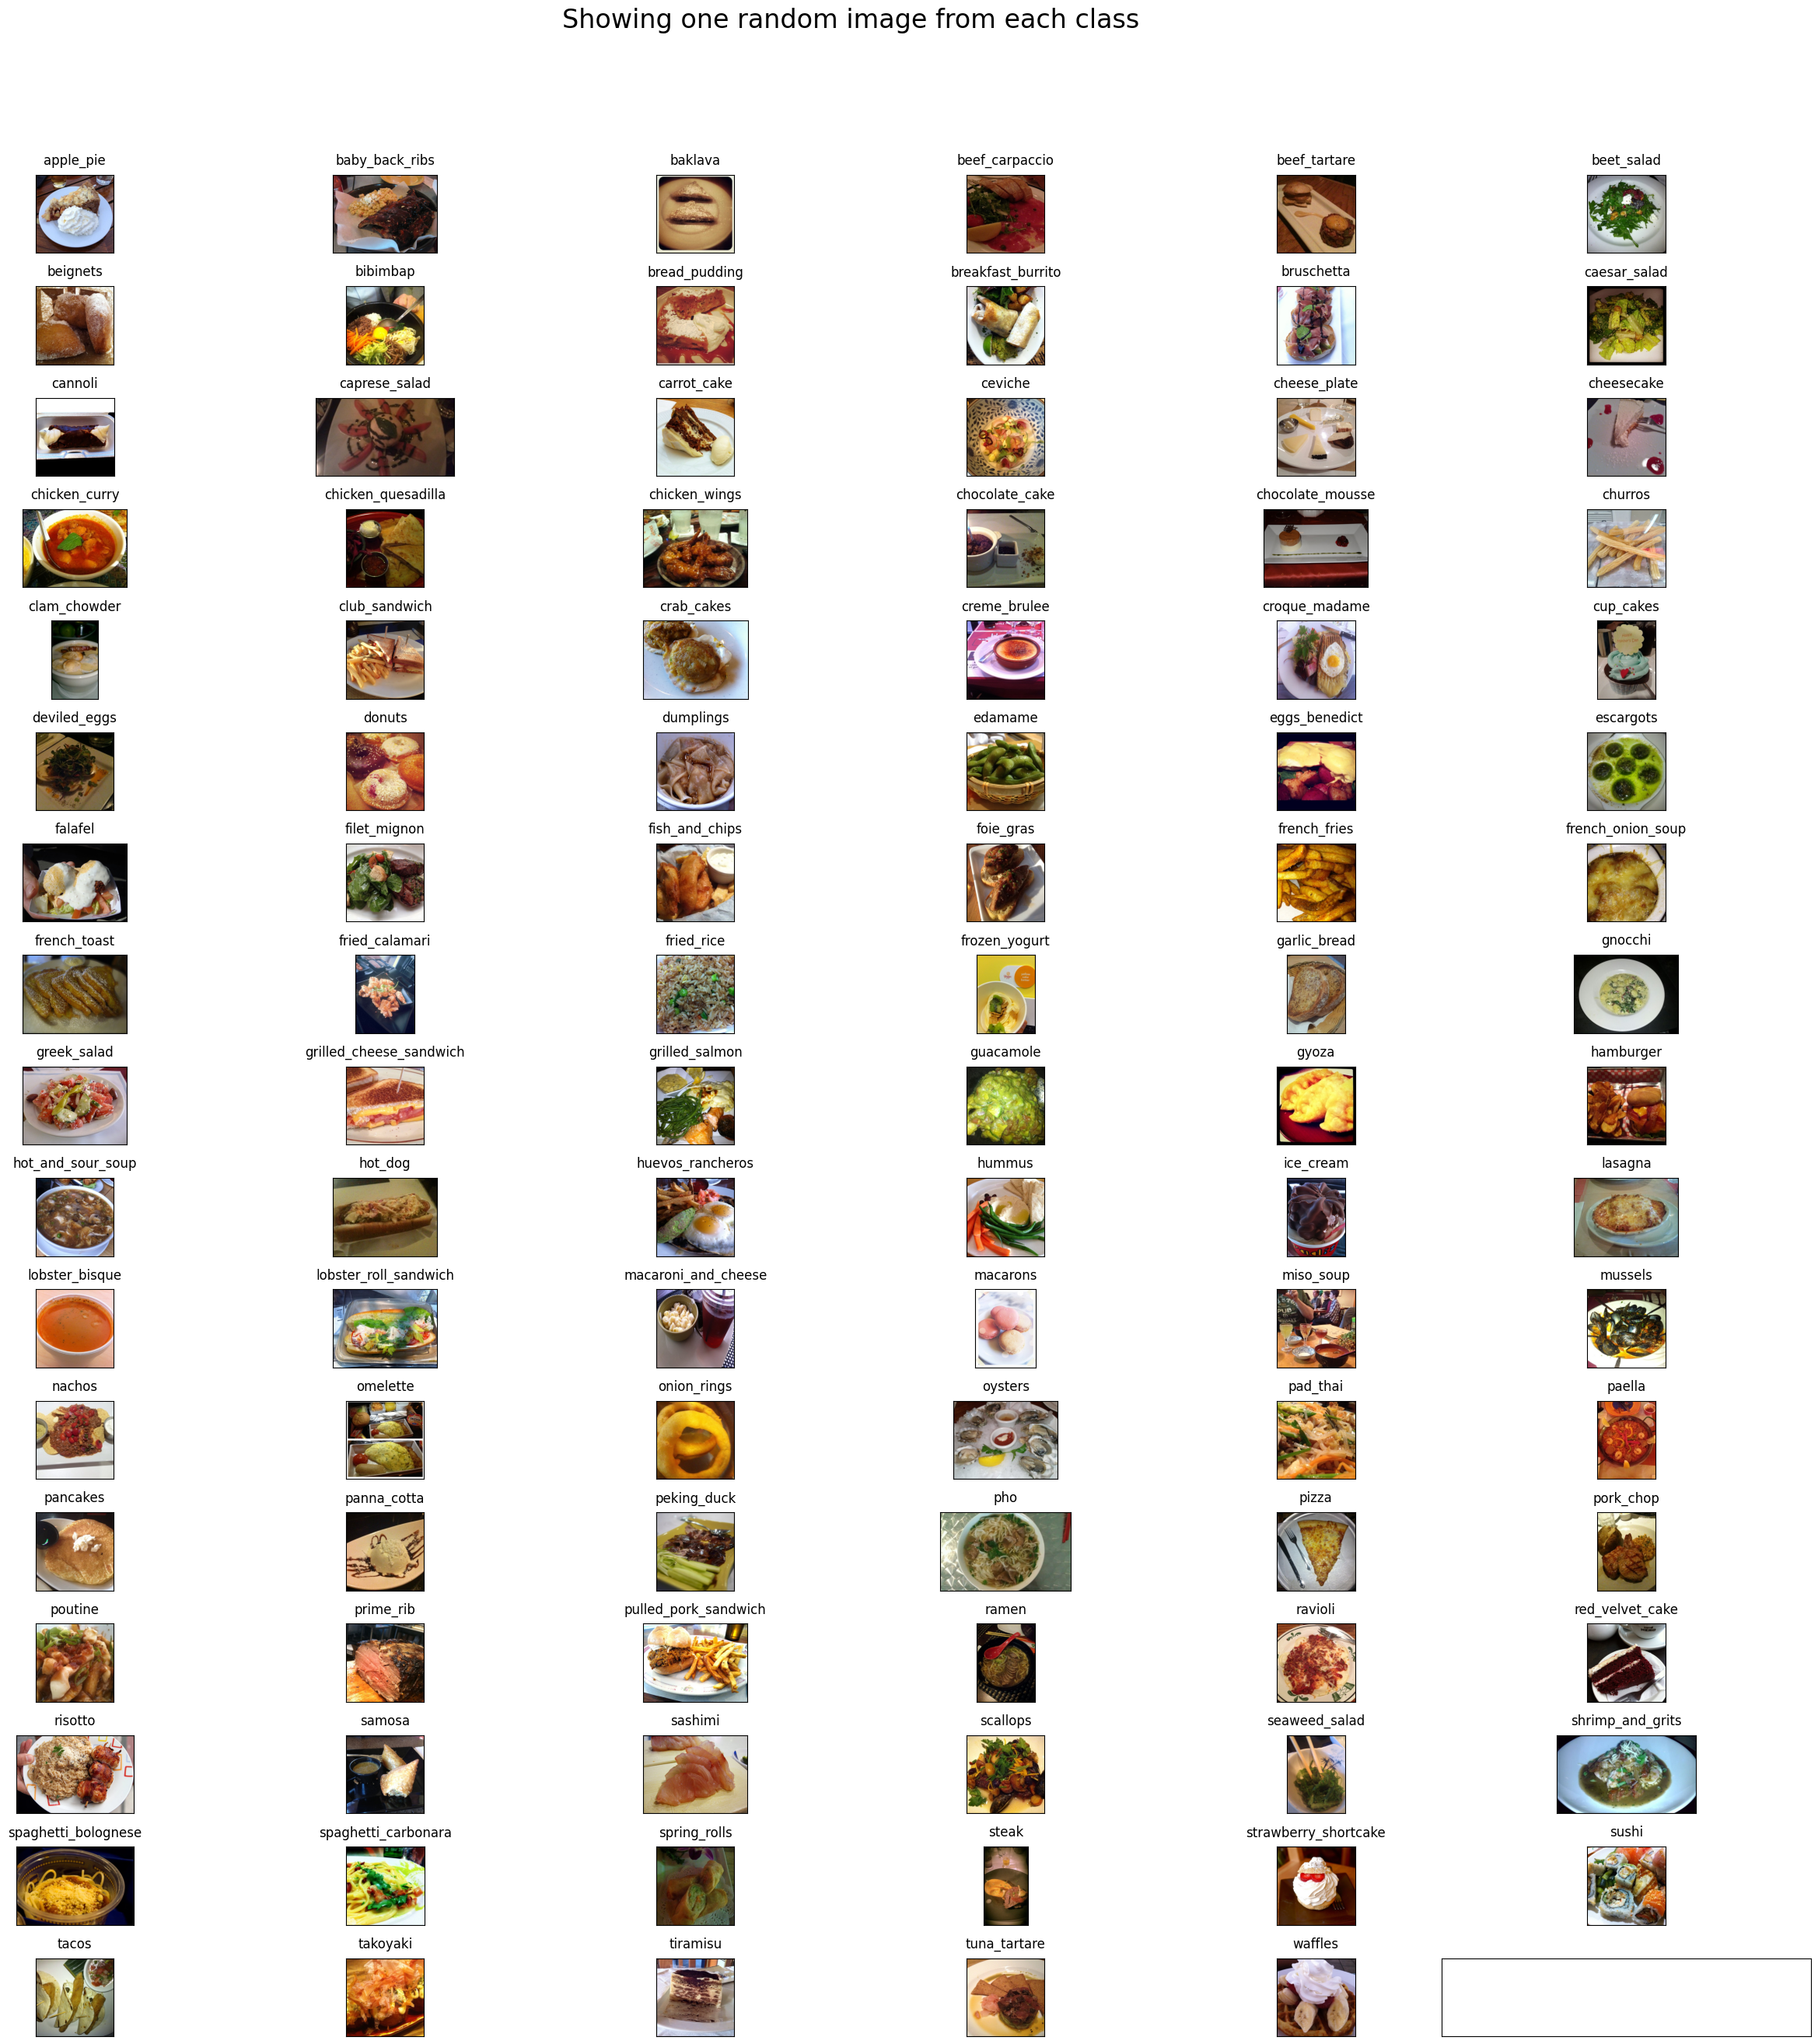

In [ ]:
from matplotlib import pyplot as plt
import numpy as np
# Visualize the data, showing one image per class from 101 classes as a sample
rows = 17
cols = 6
fig, ax = plt.subplots(rows, cols, figsize=(25,25))
fig.suptitle("Showing one random image from each class", y=1.05, fontsize=24) # Adding  y=1.05, fontsize=24 helped me fix the suptitle overlapping with axes issue
data_dir = "food-101/images/"
foods_sorted = sorted(os.listdir(data_dir))
food_id = 0
for i in range(rows):
  for j in range(cols):
    try:
      food_selected = foods_sorted[food_id]
      food_id += 1
    except:
      break
    if food_selected == '.DS_Store':
        continue
    food_selected_images = os.listdir(os.path.join(data_dir,food_selected)) # returns the list of all files present in each food category
    food_selected_random = np.random.choice(food_selected_images) # picks one food item from the list as choice, takes a list and returns one random item
    img = plt.imread(os.path.join(data_dir,food_selected, food_selected_random))
    ax[i][j].imshow(img)
    ax[i][j].set_title(food_selected, pad = 10)

plt.setp(ax, xticks=[],yticks=[])
plt.tight_layout()
# https://matplotlib.org/users/tight_layout_guide.html

# Split the data into train and test

In [ ]:
# Helper method to split dataset into train and test folders
def prepare_data(filepath, src,dest):
  classes_images = defaultdict(list)
  with open(filepath, 'r') as txt:
      paths = [read.strip() for read in txt.readlines()]
      for p in paths:
        food = p.split('/')
        classes_images[food[0]].append(food[1] + '.jpg')

  for food in classes_images.keys():
    print("\nCopying images into ",food)
    if not os.path.exists(os.path.join(dest,food)):
      os.makedirs(os.path.join(dest,food))
    for i in classes_images[food]:
      copy(os.path.join(src,food,i), os.path.join(dest,food,i))
  print("Copying Done!")

  # take the train.txt and images directory and copy images to train folder

In [ ]:
# Prepare train dataset by copying images from food-101/images to food-101/train using the file train.txt
%cd /content
print("Creating train data...")
prepare_data('/content/food-101/meta/train.txt', '/content/food-101/images', 'train')

/content
Creating train data...

Copying images into  apple_pie

Copying images into  baby_back_ribs

Copying images into  baklava

Copying images into  beef_carpaccio

Copying images into  beef_tartare

Copying images into  beet_salad

Copying images into  beignets

Copying images into  bibimbap

Copying images into  bread_pudding

Copying images into  breakfast_burrito

Copying images into  bruschetta

Copying images into  caesar_salad

Copying images into  cannoli

Copying images into  caprese_salad

Copying images into  carrot_cake

Copying images into  ceviche

Copying images into  cheesecake

Copying images into  cheese_plate

Copying images into  chicken_curry

Copying images into  chicken_quesadilla

Copying images into  chicken_wings

Copying images into  chocolate_cake

Copying images into  chocolate_mousse

Copying images into  churros

Copying images into  clam_chowder

Copying images into  club_sandwich

Copying images into  crab_cakes

Copying images into  creme_brulee

C

In [ ]:
# Prepare test data by copying images from food-101/images to food-101/test using the file test.txt
print("Creating test data...")
prepare_data('/content/food-101/meta/test.txt', '/content/food-101/images', 'test')

Creating test data...

Copying images into  apple_pie

Copying images into  baby_back_ribs

Copying images into  baklava

Copying images into  beef_carpaccio

Copying images into  beef_tartare

Copying images into  beet_salad

Copying images into  beignets

Copying images into  bibimbap

Copying images into  bread_pudding

Copying images into  breakfast_burrito

Copying images into  bruschetta

Copying images into  caesar_salad

Copying images into  cannoli

Copying images into  caprese_salad

Copying images into  carrot_cake

Copying images into  ceviche

Copying images into  cheesecake

Copying images into  cheese_plate

Copying images into  chicken_curry

Copying images into  chicken_quesadilla

Copying images into  chicken_wings

Copying images into  chocolate_cake

Copying images into  chocolate_mousse

Copying images into  churros

Copying images into  clam_chowder

Copying images into  club_sandwich

Copying images into  crab_cakes

Copying images into  creme_brulee

Copying ima

In [ ]:
# Check how many files are in the train folder
print("Total number of samples in train folder")
!find train -type d -or -type f -printf '.' | wc -c

Total number of samples in train folder
75750


In [ ]:
# Check how many files are in the test folder
print("Total number of samples in test folder")
!find test -type d -or -type f -printf '.' | wc -c

Total number of samples in test folder
25250


# Setup the data inputs

In [ ]:
train_dir = "/content/train/"
test_dir = "/content/test/"

IMAGE_SHAPE = (224, 224)     #perfect size for pic to be able to work with
BATCH_SIZE = 32              #16 may overfit brc he trains on a small no. & if more than 32 not enough power for run...
SHUFFLE_BUFFER_SIZE = 1000   #size of 1000 ensures that the images are shuffled to randomize the order of the training data & to avoiding learning biases.
'''
224x224 is a commonly used resolution that balances detail with computational efficiency.
'''
train_data = tf.keras.preprocessing.image_dataset_from_directory(directory=train_dir,
                                                                 image_size=IMAGE_SHAPE,
                                                                 batch_size=BATCH_SIZE,
                                                                 label_mode="categorical")

test_data = tf.keras.preprocessing.image_dataset_from_directory(directory=test_dir,
                                                                 image_size=IMAGE_SHAPE,
                                                                 batch_size=BATCH_SIZE,
                                                                 label_mode="categorical")

#label_mode="categorical": Labels are returned in one-hot encoded format, where each label is represented by a vector ex:[1, 0, 0, ...]

Found 75750 files belonging to 101 classes.
Found 25250 files belonging to 101 classes.


In [ ]:
train_data   #to check the specs

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 101), dtype=tf.float32, name=None))>

In [ ]:
class_names = train_data.class_names
class_names  #to check the classes

['apple_pie',
 'baby_back_ribs',
 'baklava',
 'beef_carpaccio',
 'beef_tartare',
 'beet_salad',
 'beignets',
 'bibimbap',
 'bread_pudding',
 'breakfast_burrito',
 'bruschetta',
 'caesar_salad',
 'cannoli',
 'caprese_salad',
 'carrot_cake',
 'ceviche',
 'cheese_plate',
 'cheesecake',
 'chicken_curry',
 'chicken_quesadilla',
 'chicken_wings',
 'chocolate_cake',
 'chocolate_mousse',
 'churros',
 'clam_chowder',
 'club_sandwich',
 'crab_cakes',
 'creme_brulee',
 'croque_madame',
 'cup_cakes',
 'deviled_eggs',
 'donuts',
 'dumplings',
 'edamame',
 'eggs_benedict',
 'escargots',
 'falafel',
 'filet_mignon',
 'fish_and_chips',
 'foie_gras',
 'french_fries',
 'french_onion_soup',
 'french_toast',
 'fried_calamari',
 'fried_rice',
 'frozen_yogurt',
 'garlic_bread',
 'gnocchi',
 'greek_salad',
 'grilled_cheese_sandwich',
 'grilled_salmon',
 'guacamole',
 'gyoza',
 'hamburger',
 'hot_and_sour_soup',
 'hot_dog',
 'huevos_rancheros',
 'hummus',
 'ice_cream',
 'lasagna',
 'lobster_bisque',
 'lobster

# Data Visualization

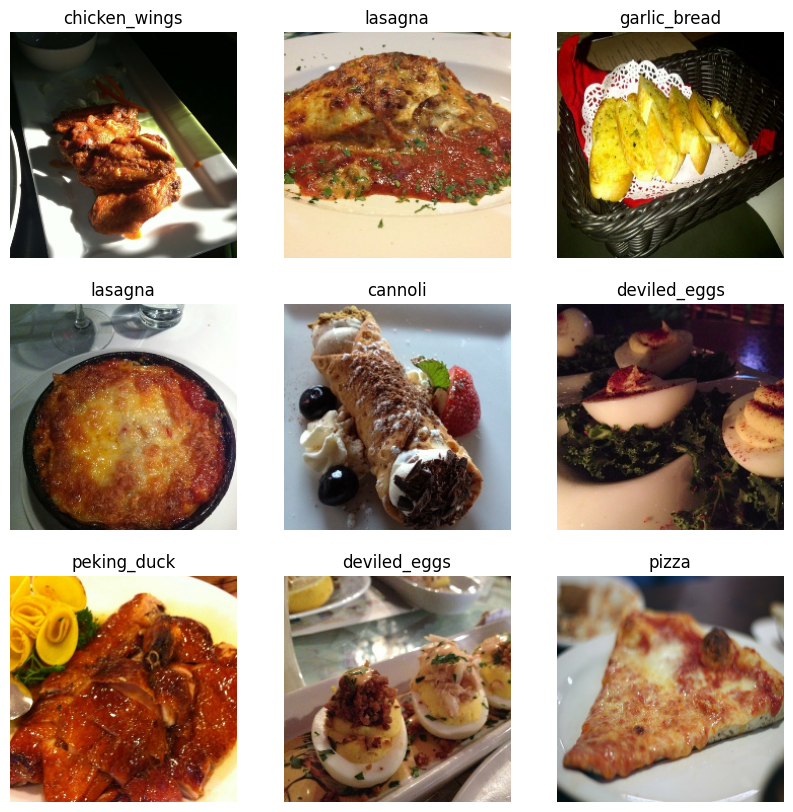

In [ ]:
import matplotlib.pyplot as plt

def visualize_small_batch(dataset, class_names, num_images=9):
    # Take a single batch from the dataset
    for images, labels in dataset.take(1):
        plt.figure(figsize=(10, 10))
        for i in range(min(num_images, images.shape[0])):
            ax = plt.subplot(3, 3, i + 1)
            plt.imshow(images[i].numpy()/255)
            plt.title(class_names[tf.argmax(labels[i])])
            plt.axis("off")
        plt.show()

# Visualize a small batch of processed images
visualize_small_batch(train_data, class_names, num_images=9)


# Mixed perscision Training

In [ ]:
#technique used to speed up model training and reduce memory usage
from tensorflow.keras import mixed_precision
policy = mixed_precision.Policy('mixed_float16')
mixed_precision.set_global_policy(policy)
'''
Why Use Mixed Precision?
-Increased Training Speed
-Reduced Memory Usage
-Maintained Accuracy
'''

# Model Building And Training

## EfficientNet Model

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, LearningRateScheduler
import tensorflow as tf

# Define and compile the model using EfficientNetV2B0
base_model = keras.applications.EfficientNetB0(include_top=False)
base_model.trainable = False  # Initially freeze the base model
'''
Freeze the base model:
freezes the layers of the base model. pre-trained weights won’t be updated during training,
useful to leverage the existing features of the model without altering them initially
'''

# Get the number of classes in the dataset
num_classes = len(os.listdir(train_dir))

#Create inputs into the base model
inputs = tf.keras.layers.Input(shape=(224, 224, 3), name="input_layer") # Shape 224x224 with 3 color channels (RGB)

#Pass the inputs to the base_model
x = base_model(inputs)
x = tf.keras.layers.GlobalAveragePooling2D(name="global_average_pooling_layer")(x)
#layer to reduces dimensions by avg features across each feature map.
#helps reduce model's size & prevent overfitting.

outputs = tf.keras.layers.Dense(num_classes, activation="softmax", name="output_layer")(x)
model = tf.keras.Model(inputs, outputs)

# Compile the model
model.compile(loss='categorical_crossentropy', #how well the model’s predictions match the true labels in multi-class classifications.
              optimizer=tf.keras.optimizers.Adam(), #adapts the learning rate during training, often results in faster & more stable convergence.
              metrics=["accuracy"])

# Define callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)  #stops when validation loss doesn't improve
checkpoint = ModelCheckpoint('feature_extractor.keras', monitor='val_accuracy', save_best_only=True, save_weights_only=False , mode='max', verbose=1)
# This ensures that you have the best model saved, even if later epochs cause performance to drop

# Train the model
history = model.fit(
    train_data,
    epochs=10,
    validation_data=test_data,
    validation_steps= int(0.15*len(test_data)),  # no. of batches to validate after each epoch. 15% of the total validation dataset.
    callbacks=[early_stopping,checkpoint]
)


16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/10
2368/2368 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step - accuracy: 0.4334 - loss: 2.4812
Epoch 1: val_accuracy improved from -inf to 0.66340, saving model to feature_extractor.keras
2368/2368 ━━━━━━━━━━━━━━━━━━━━ 250s 95ms/step - accuracy: 0.4334 - loss: 2.4810 - val_accuracy: 0.6634 - val_loss: 1.2686
Epoch 2/10
2367/2368 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step - accuracy: 0.6262 - loss: 1.4622
Epoch 2: val_accuracy improved from 0.66340 to 0.69227, saving model to feature_extractor.keras
2368/2368 ━━━━━━━━━━━━━━━━━━━━ 193s 82ms/step - accuracy: 0.6262 - loss: 1.4621 - val_accuracy: 0.6923 - val_loss: 1.1598
Epoch 3/10
2367/2368 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step - accuracy: 0.6624 - loss: 1.2995
Epoch 3: val_accuracy did not improve from 0.69227
2368/2368 ━━━━━━━━━━━━━━━━━━━━ 191s 81ms/step - accuracy: 0.6624 - loss: 1.2994 - val_accuracy: 0.6880 - val_loss: 1.1487
Epoch 4/10
2367/2368 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - accuracy: 0.6865 - 

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


2367/2368 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.7332 - loss: 1.0044
Epoch 8: val_accuracy improved from 0.69836 to 0.70948, saving model to feature_extractor.keras
2368/2368 ━━━━━━━━━━━━━━━━━━━━ 160s 68ms/step - accuracy: 0.7332 - loss: 1.0044 - val_accuracy: 0.7095 - val_loss: 1.0765
Epoch 9/10
2368/2368 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - accuracy: 0.7396 - loss: 0.9791
Epoch 9: val_accuracy improved from 0.70948 to 0.71107, saving model to feature_extractor.keras
2368/2368 ━━━━━━━━━━━━━━━━━━━━ 202s 68ms/step - accuracy: 0.7396 - loss: 0.9791 - val_accuracy: 0.7111 - val_loss: 1.0828
Epoch 10/10
2367/2368 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - accuracy: 0.7468 - loss: 0.9516
Epoch 10: val_accuracy did not improve from 0.71107
2368/2368 ━━━━━━━━━━━━━━━━━━━━ 160s 67ms/step - accuracy: 0.7468 - loss: 0.9516 - val_accuracy: 0.6944 - val_loss: 1.1211


In [ ]:
#evaluate the model
model.evaluate(test_data)

790/790 ━━━━━━━━━━━━━━━━━━━━ 57s 73ms/step - accuracy: 0.7072 - loss: 1.0909


[1.1115961074829102, 0.7000792026519775]

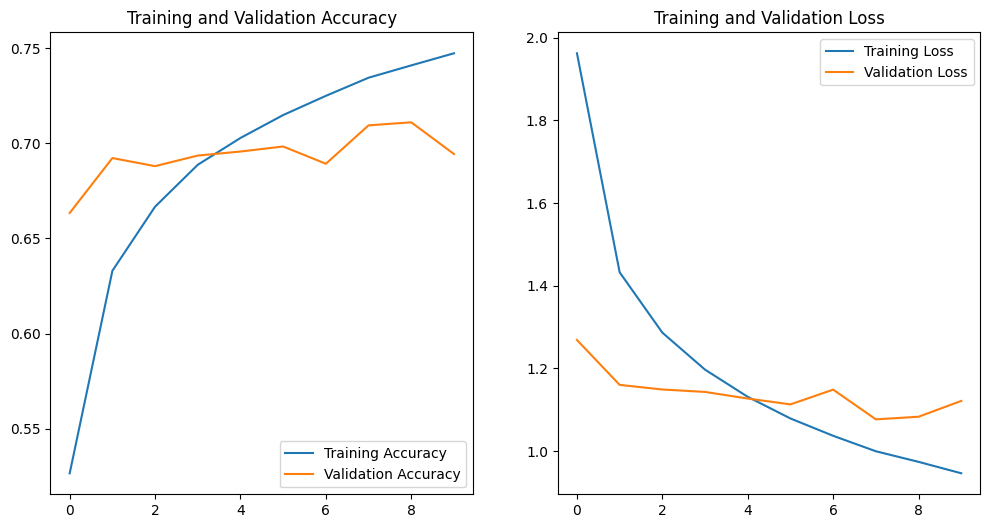

In [ ]:
import matplotlib.pyplot as plt

# Extract the data from the training history
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(acc))

# Plot training and validation accuracy
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

# Plot training and validation loss
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

plt.show()
'''
Explaining the graph
Learning Progress:
The model is learning well, as shown by the steady improvement in training accuracy and the decrease in training loss.
the meeting poin is the best generalization
'''

In [ ]:
model.save('FinedTunedModel.h5')

In [ ]:
from tensorflow.keras.models import load_model

# Load the fine-tuned model
Finetuning_Model = load_model('FinedTunedModel.h5')

In [ ]:
Finetuning_Model.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ efficientnetb0 (Functional)          │ (None, 7, 7, 1280)          │       4,049,571 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling_layer         │ (None, 1280)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ output_layer (Dense)                 │ (None, 101)                 │         129,381 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,178,958 (15.94 MB)

 Trainable params: 129,381 (505.39 KB)

 Non-trainable params: 4,049,571 (15.45 MB)

 Optimizer params: 6 (36.00 B)

In [ ]:
for layer in Finetuning_Model.layers:
  layer.trainable = True

In [ ]:
#Compile the finetuning model
Finetuning_Model.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

In [ ]:
history_Finetuning = Finetuning_Model.fit(
    train_data,
    epochs=10,
    validation_data=test_data,
    validation_steps= int(0.15*len(test_data)),
    callbacks=[early_stopping,checkpoint]
)

Epoch 1/10
2368/2368 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step - accuracy: 0.5722 - loss: 1.6939
Epoch 1: val_accuracy did not improve from 0.71107
2368/2368 ━━━━━━━━━━━━━━━━━━━━ 406s 130ms/step - accuracy: 0.5722 - loss: 1.6938 - val_accuracy: 0.6941 - val_loss: 1.1272
Epoch 2/10
2368/2368 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step - accuracy: 0.7091 - loss: 1.0799
Epoch 2: val_accuracy improved from 0.71107 to 0.72669, saving model to feature_extractor.keras
2368/2368 ━━━━━━━━━━━━━━━━━━━━ 285s 113ms/step - accuracy: 0.7091 - loss: 1.0798 - val_accuracy: 0.7267 - val_loss: 1.0438
Epoch 3/10
2367/2368 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step - accuracy: 0.7629 - loss: 0.8593
Epoch 3: val_accuracy improved from 0.72669 to 0.73279, saving model to feature_extractor.keras
2368/2368 ━━━━━━━━━━━━━━━━━━━━ 336s 119ms/step - accuracy: 0.7629 - loss: 0.8593 - val_accuracy: 0.7328 - val_loss: 1.0584
Epoch 4/10
2368/2368 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step - accuracy: 0.8027 - loss: 0.6918
Epoch 4: val_accuracy did no

In [ ]:
Finetuning_Model.evaluate(test_data)

790/790 ━━━━━━━━━━━━━━━━━━━━ 73s 92ms/step - accuracy: 0.7139 - loss: 1.0730


[1.0902451276779175, 0.7104158401489258]

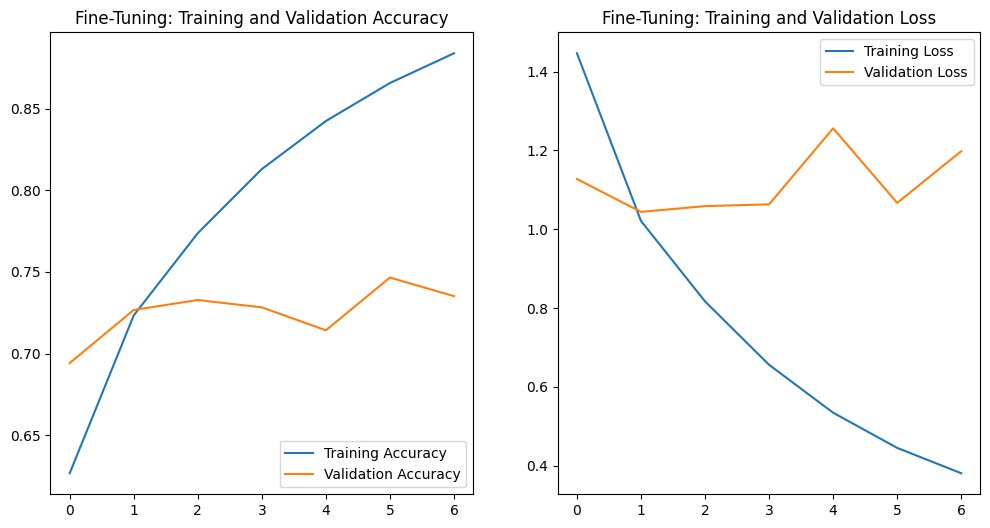

In [ ]:
import matplotlib.pyplot as plt

# Extract the data from the fine-tuning history
acc = history_Finetuning.history['accuracy']
val_acc = history_Finetuning.history['val_accuracy']
loss = history_Finetuning.history['loss']
val_loss = history_Finetuning.history['val_loss']

epochs_range = range(len(acc))

# Plot training and validation accuracy
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Fine-Tuning: Training and Validation Accuracy')

# Plot training and validation loss
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Fine-Tuning: Training and Validation Loss')

plt.show()


In [ ]:
#checking prediction for confusion matrix
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

y_true = []
y_pred = []

for images, labels in test_data:
    preds = Finetuning_Model.predict(images)
    y_true.extend(np.argmax(labels, axis=1))
    y_pred.extend(np.argmax(preds, axis=1))

y_true = np.array(y_true)
y_pred = np.array(y_pred)


1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━

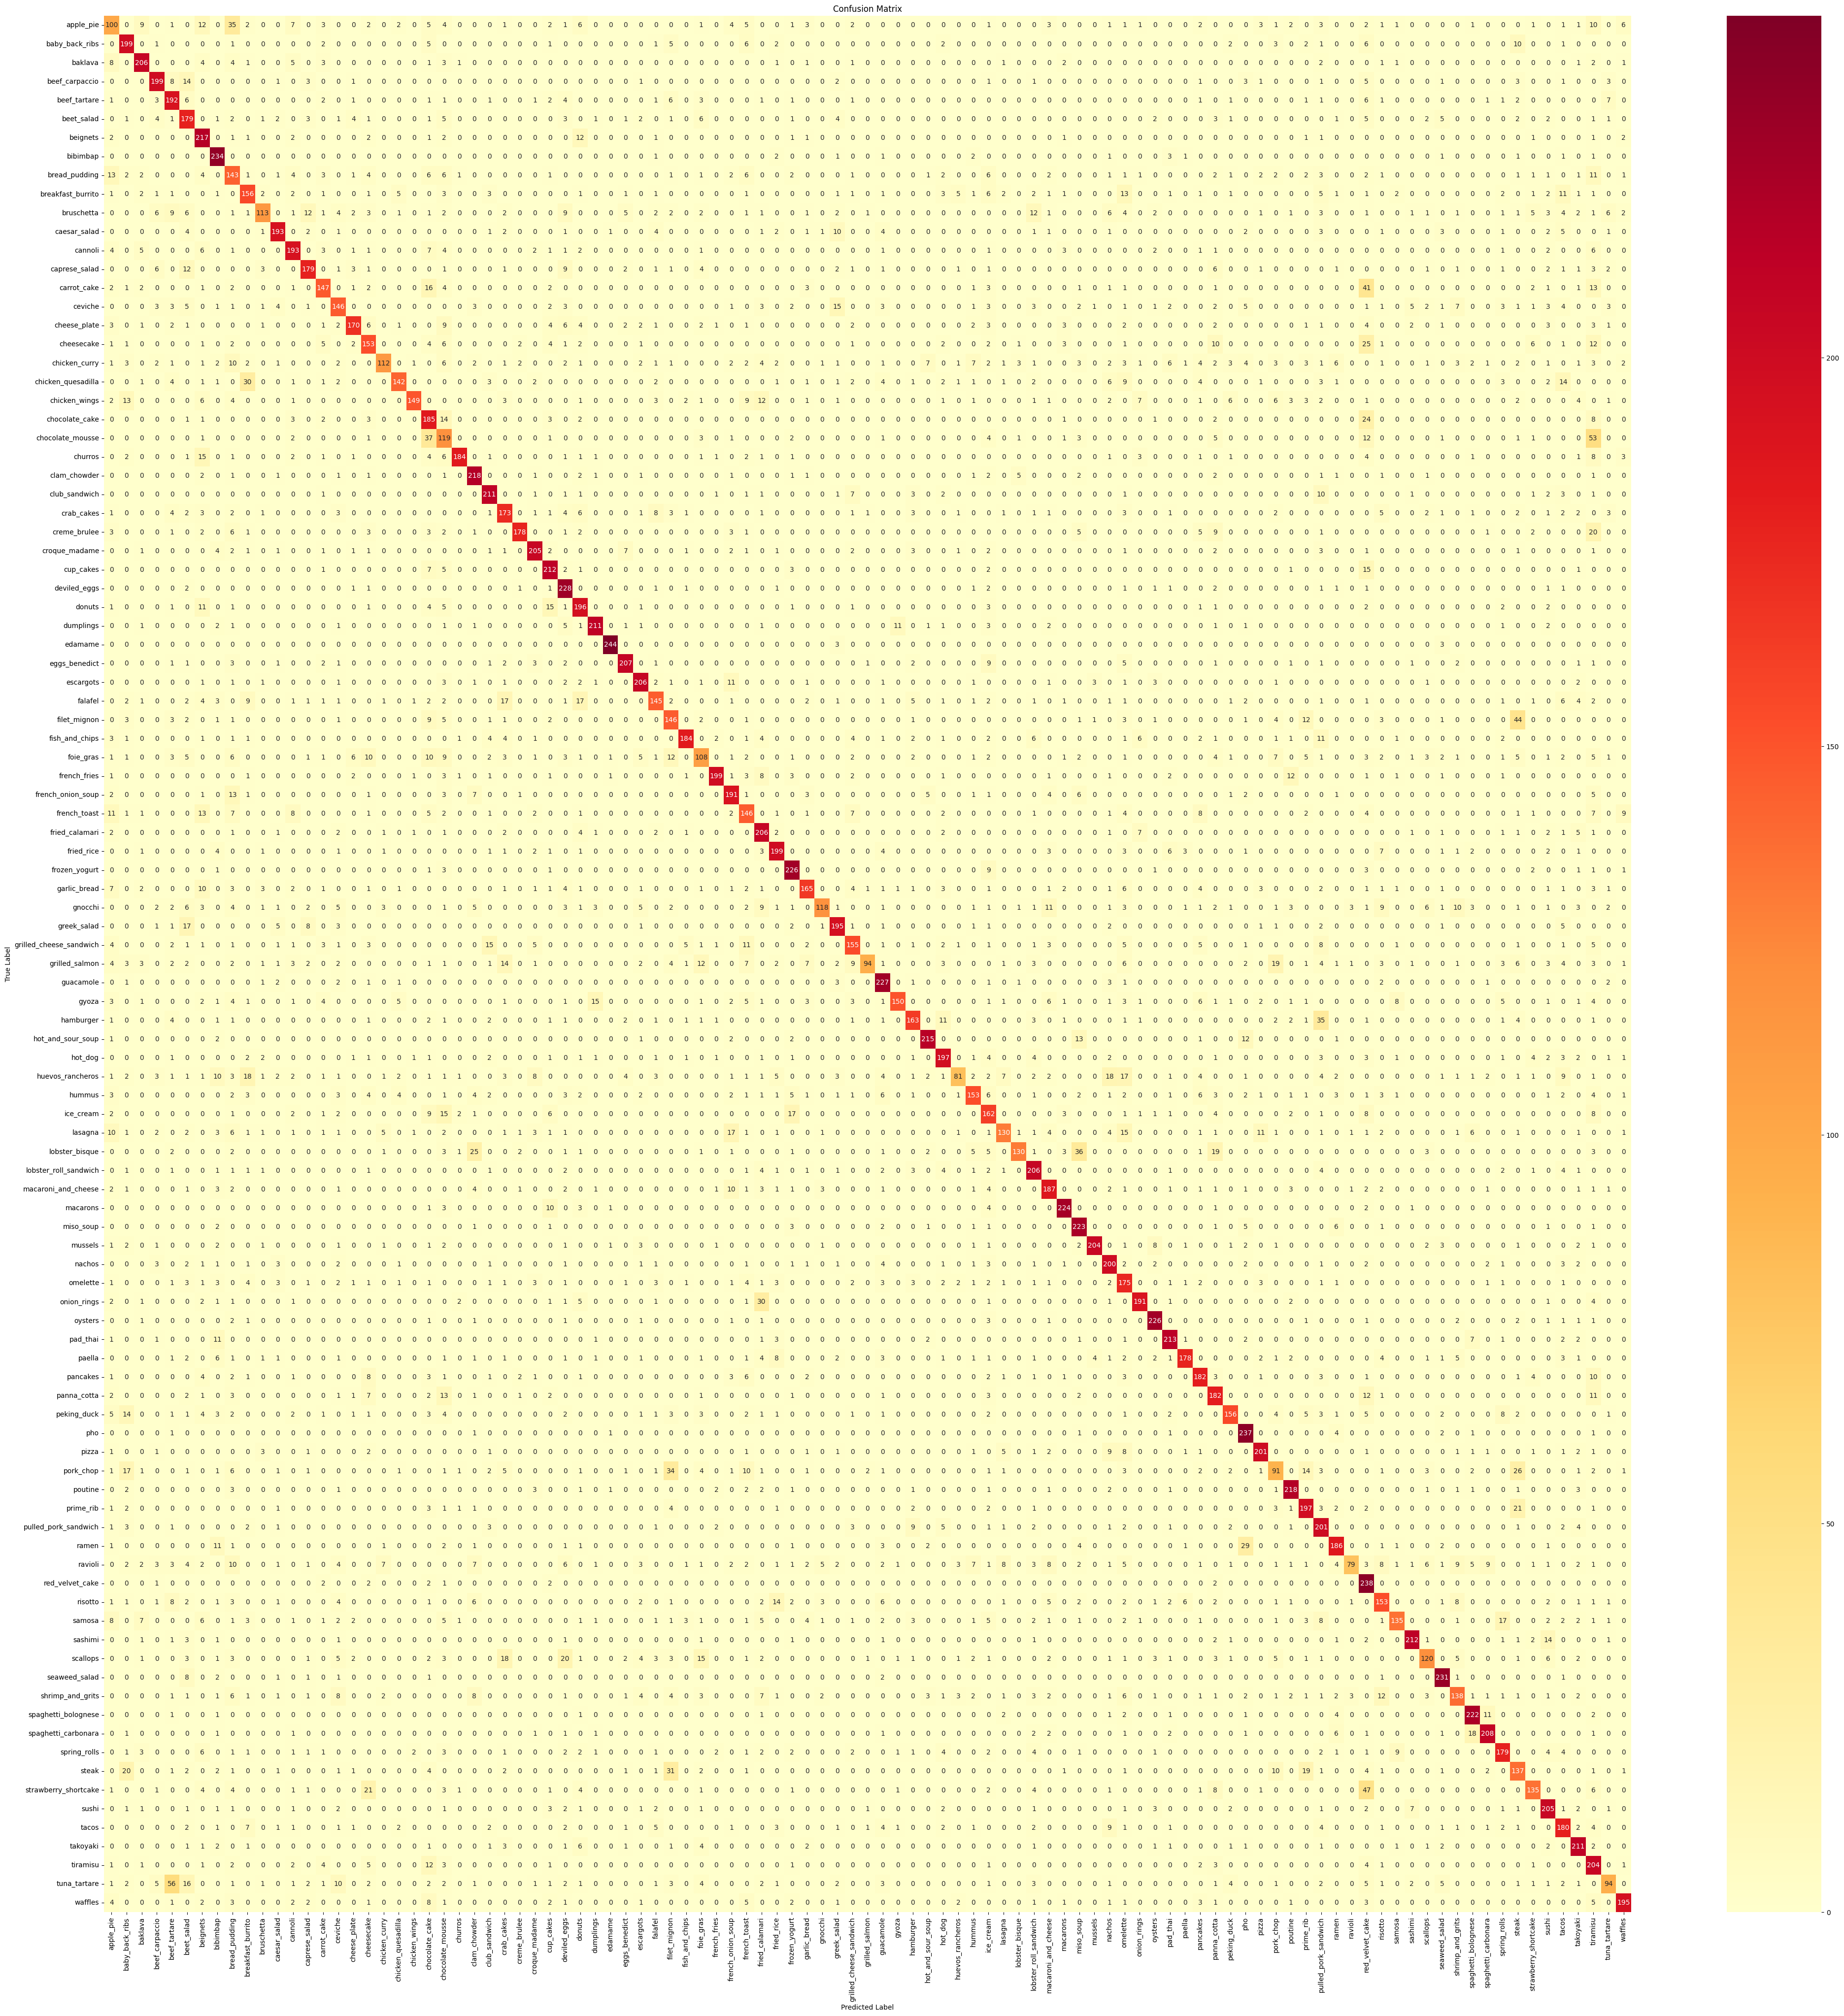

In [ ]:
# Create confusion matrix
conf_mat = confusion_matrix(y_true, y_pred)

# Plot confusion matrix
plt.figure(figsize=(50, 50))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='YlOrRd', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
# Generate classification report for the subset
class_report = classification_report(y_true, y_pred, target_names=class_names)
print("Classification Report (10% of Test Data):\n", class_report)


Classification Report (10% of Test Data):
                          precision    recall  f1-score   support

              apple_pie       0.43      0.40      0.41       250
         baby_back_ribs       0.65      0.80      0.71       250
                baklava       0.80      0.82      0.81       250
         beef_carpaccio       0.80      0.80      0.80       250
           beef_tartare       0.59      0.77      0.66       250
             beet_salad       0.55      0.72      0.62       250
               beignets       0.60      0.87      0.71       250
               bibimbap       0.71      0.94      0.81       250
          bread_pudding       0.42      0.57      0.48       250
      breakfast_burrito       0.61      0.62      0.62       250
             bruschetta       0.80      0.45      0.58       250
           caesar_salad       0.82      0.77      0.80       250
                cannoli       0.74      0.77      0.76       250
          caprese_salad       0.79      0.72  

## ResNet Model

In [ ]:
from tensorflow import keras
from tensorflow.keras.applications import ResNet50
from tensorflow.keras import layers , models
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint, LearningRateScheduler
import tensorflow as tf
#ResNet50: A popular pre-trained convolutional neural network (CNN) model

# Build the ResNet model
base_model = ResNet50(include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False  # Freeze the base model

num_classes = len(os.listdir(train_dir))

#Create inputs into the base model
inputs = tf.keras.layers.Input(shape=(224, 224, 3), name="input_layer")

#Pass the inputs to the base_model
x = base_model(inputs)
x = tf.keras.layers.GlobalAveragePooling2D(name="global_average_pooling_layer")(x)
outputs = tf.keras.layers.Dense(num_classes, activation="softmax", name="output_layer")(x)
ResNet_model = tf.keras.Model(inputs, outputs)

# 9. Compile the model
ResNet_model.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Define callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
#lr_reduction = ReduceLROnPlateau(monitor='val_loss', patience=2, verbose=1, factor=0.1)
checkpoint = ModelCheckpoint('ResNet_model.keras', monitor='val_accuracy', save_best_only=True, save_weights_only=False , mode='max', verbose=1)


# Train the model with more epochs initially to monitor performance
history = ResNet_model.fit(
    train_data,
    epochs=10,  # Increased epochs for better training
    validation_data=test_data,
    validation_steps= int(0.15*len(test_data)),
    callbacks=[early_stopping,checkpoint]
)

Epoch 1/10
2368/2368 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step - accuracy: 0.3193 - loss: 3.0538
Epoch 1: val_accuracy improved from -inf to 0.51298, saving model to ResNet_model.keras
2368/2368 ━━━━━━━━━━━━━━━━━━━━ 291s 118ms/step - accuracy: 0.3193 - loss: 3.0536 - val_accuracy: 0.5130 - val_loss: 1.9531
Epoch 2/10
2367/2368 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step - accuracy: 0.5229 - loss: 1.9332
Epoch 2: val_accuracy improved from 0.51298 to 0.54661, saving model to ResNet_model.keras
2368/2368 ━━━━━━━━━━━━━━━━━━━━ 277s 100ms/step - accuracy: 0.5230 - loss: 1.9332 - val_accuracy: 0.5466 - val_loss: 1.7969
Epoch 3/10
2367/2368 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step - accuracy: 0.5767 - loss: 1.6966
Epoch 3: val_accuracy did not improve from 0.54661
2368/2368 ━━━━━━━━━━━━━━━━━━━━ 271s 104ms/step - accuracy: 0.5767 - loss: 1.6966 - val_accuracy: 0.5347 - val_loss: 1.8886
Epoch 4/10
2368/2368 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step - accuracy: 0.6078 - loss: 1.5372
Epoch 4: val_accuracy did not improve from 0

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)



Epoch 7: val_accuracy did not improve from 0.55694
2368/2368 ━━━━━━━━━━━━━━━━━━━━ 276s 116ms/step - accuracy: 0.6712 - loss: 1.2451 - val_accuracy: 0.5420 - val_loss: 1.9754


In [ ]:
# Evaluate the model
ResNet_model.evaluate(test_data)

790/790 ━━━━━━━━━━━━━━━━━━━━ 76s 96ms/step - accuracy: 0.5387 - loss: 1.8407


[1.8468773365020752, 0.5405544638633728]

In [ ]:
ResNet_model.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ resnet50 (Functional)                │ (None, 7, 7, 2048)          │      23,587,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling_layer         │ (None, 2048)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ output_layer (Dense)                 │ (None, 101)                 │         206,949 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 24,208,565 (92.35 MB)

 Trainable params: 206,949 (808.39 KB)

 Non-trainable params: 23,587,712 (89.98 MB)

 Optimizer params: 413,904 (1.58 MB)

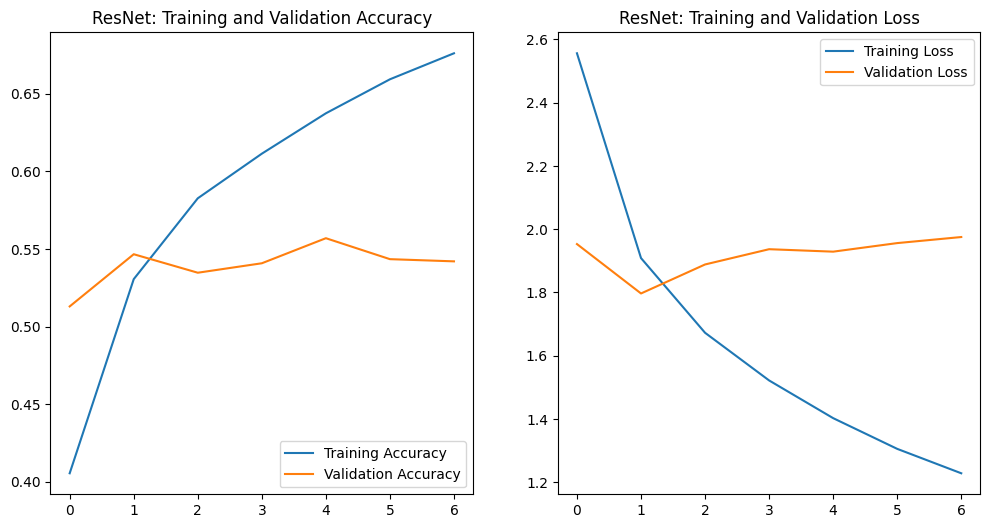

In [ ]:
# Extract the data from the training history
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(acc))

# Plot training and validation accuracy
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('ResNet: Training and Validation Accuracy')

# Plot training and validation loss
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('ResNet: Training and Validation Loss')

plt.show()


In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

y_true = []
y_pred = []

for images, labels in test_data:
    preds = ResNet_model.predict(images)
    y_true.extend(np.argmax(labels, axis=1))
    y_pred.extend(np.argmax(preds, axis=1))

y_true = np.array(y_true)
y_pred = np.array(y_pred)


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━

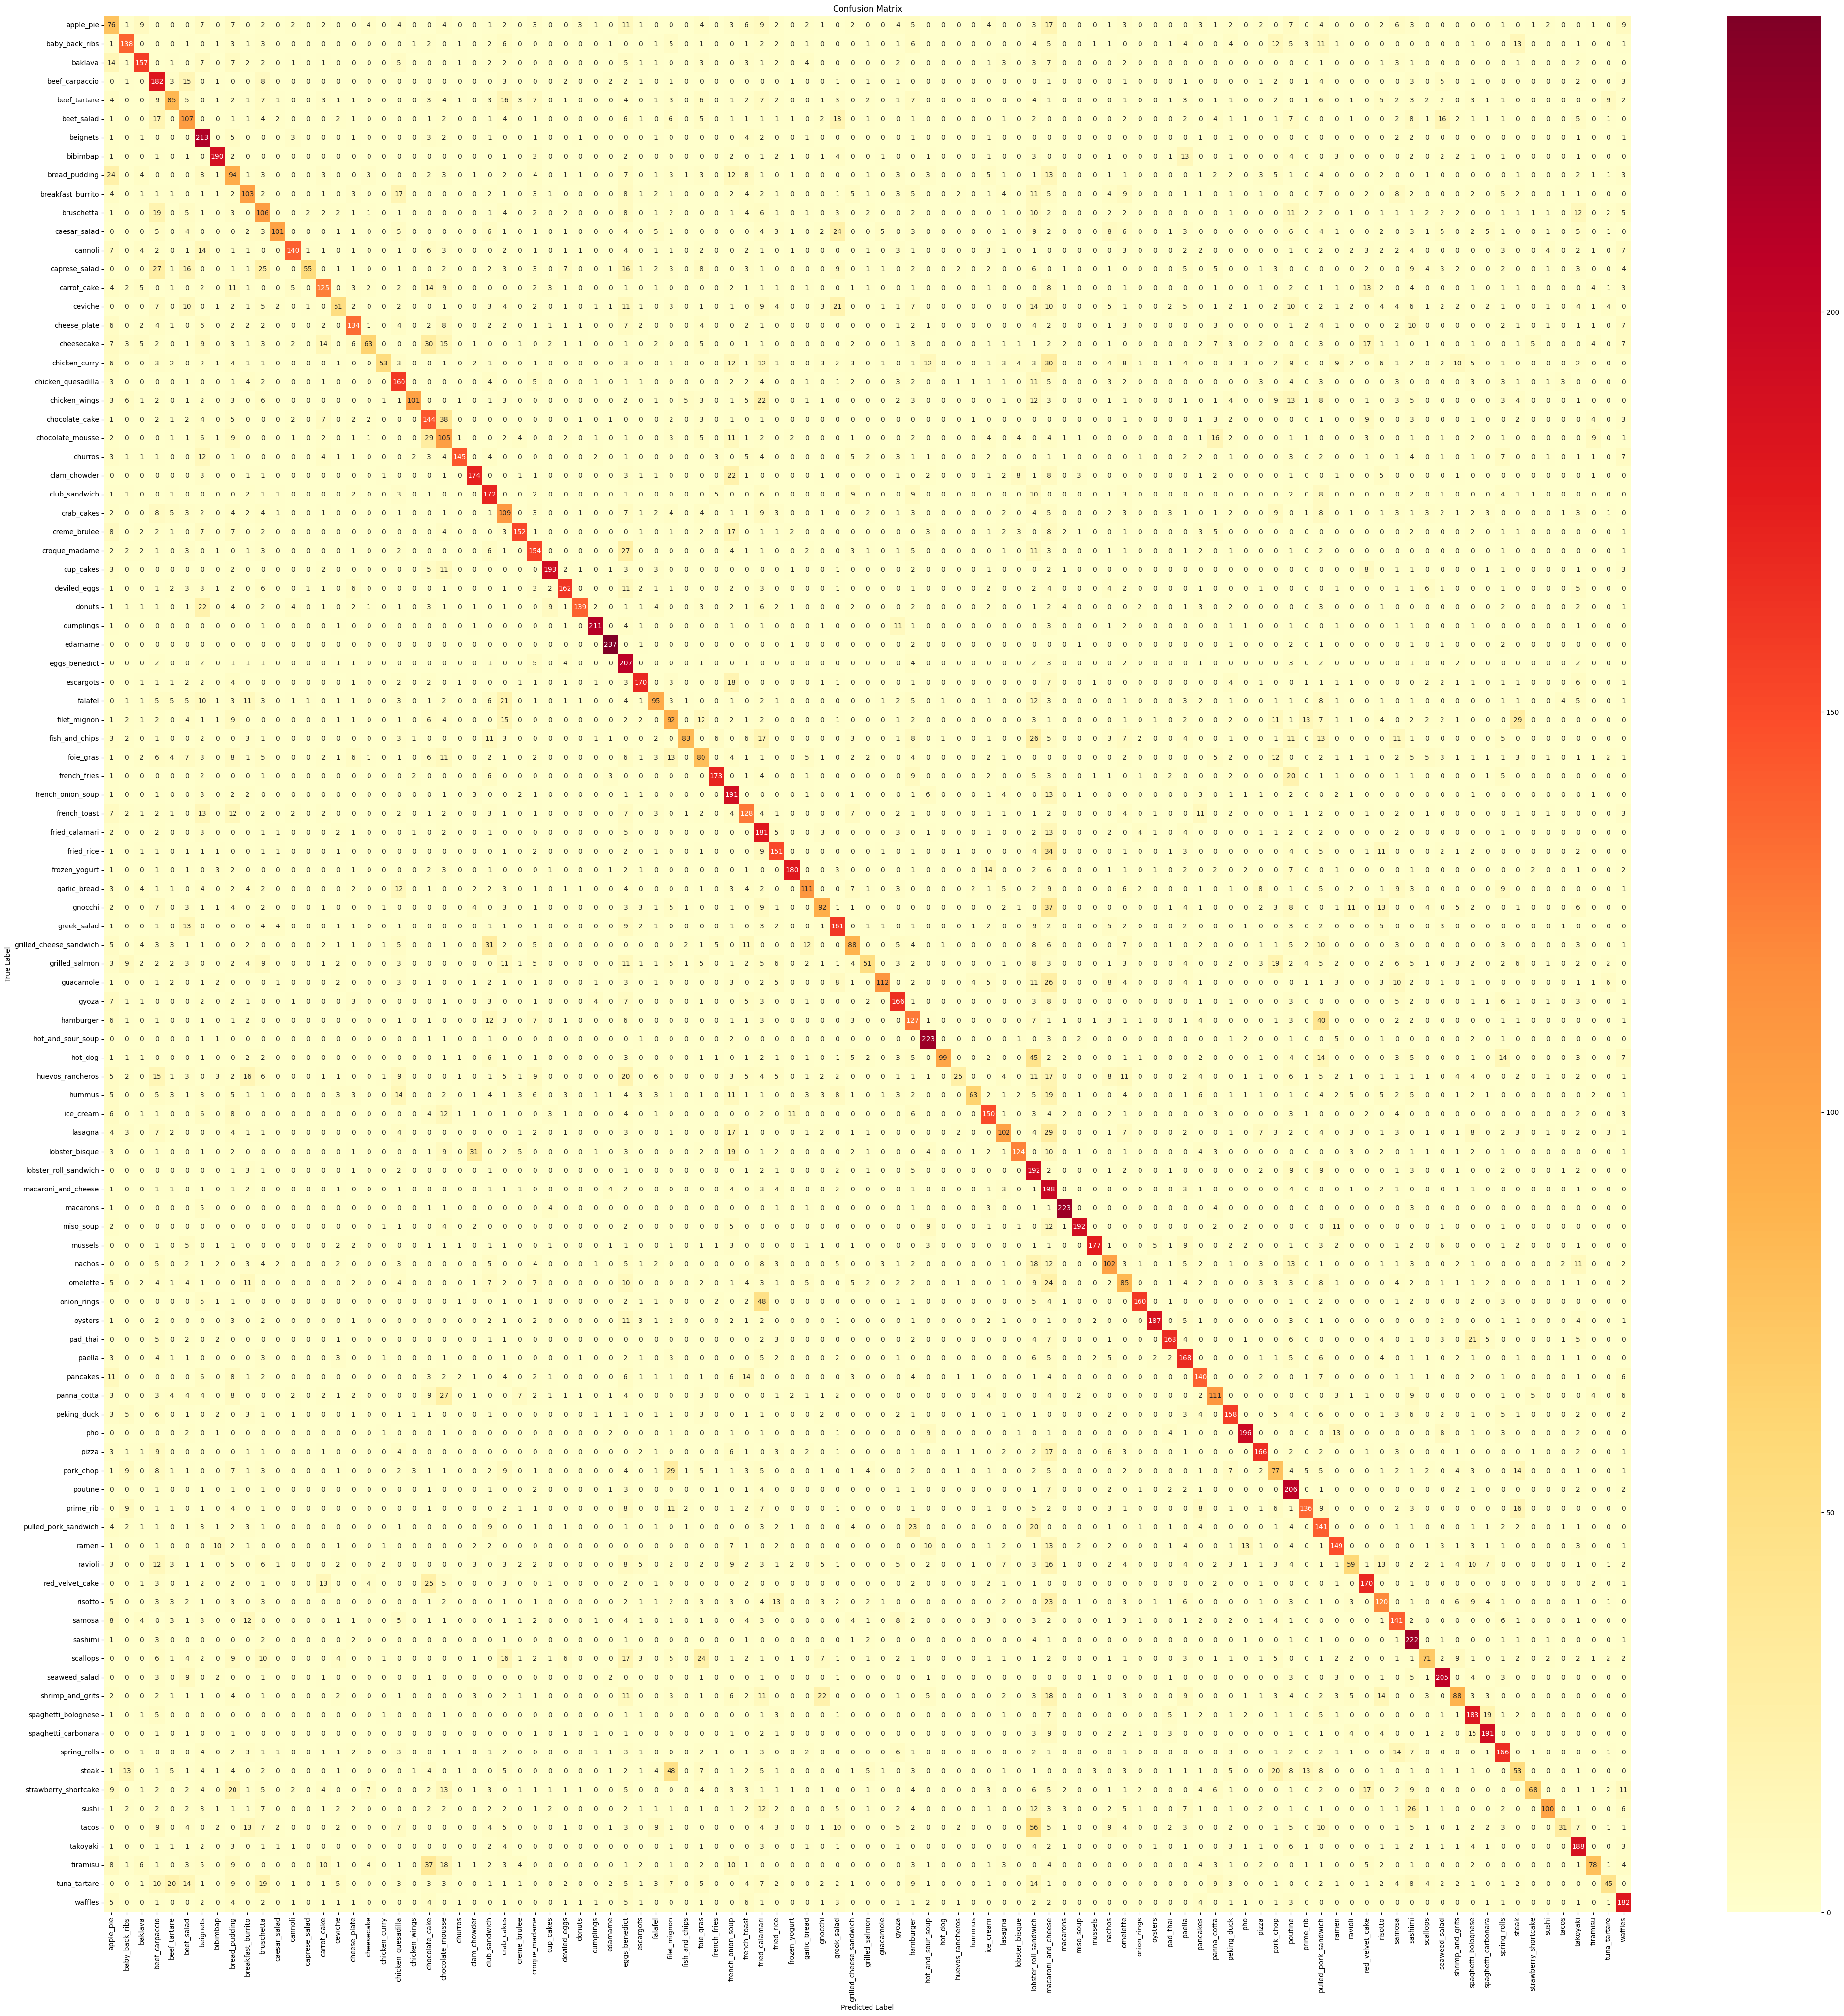

In [ ]:
# Create confusion matrix
conf_mat = confusion_matrix(y_true, y_pred)

# Plot confusion matrix
plt.figure(figsize=(50, 50))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='YlOrRd', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
# Generate classification report for the subset
class_report = classification_report(y_true, y_pred, target_names=class_names)
print("Classification Report (10% of Test Data):\n", class_report)


Classification Report (10% of Test Data):
                          precision    recall  f1-score   support

              apple_pie       0.22      0.30      0.26       250
         baby_back_ribs       0.62      0.55      0.58       250
                baklava       0.67      0.63      0.65       250
         beef_carpaccio       0.38      0.73      0.50       250
           beef_tartare       0.48      0.34      0.40       250
             beet_salad       0.36      0.43      0.39       250
               beignets       0.47      0.85      0.60       250
               bibimbap       0.79      0.76      0.78       250
          bread_pudding       0.25      0.38      0.30       250
      breakfast_burrito       0.43      0.41      0.42       250
             bruschetta       0.32      0.42      0.36       250
           caesar_salad       0.83      0.40      0.54       250
                cannoli       0.81      0.56      0.66       250
          caprese_salad       0.90      0.22  

In [ ]:
# Calculate the number of batches to take
num_batches = int(0.1 * len(test_data))

# Take 10% of the test data
test_data_subset = test_data.take(num_batches)


In [ ]:
# Get true labels and predictions for the subset
y_true = []
y_pred = []

for images, labels in test_data_subset:
    preds = ResNet_model.predict(images)
    y_true.extend(np.argmax(labels, axis=1))
    y_pred.extend(np.argmax(preds, axis=1))

y_true = np.array(y_true)
y_pred = np.array(y_pred)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━

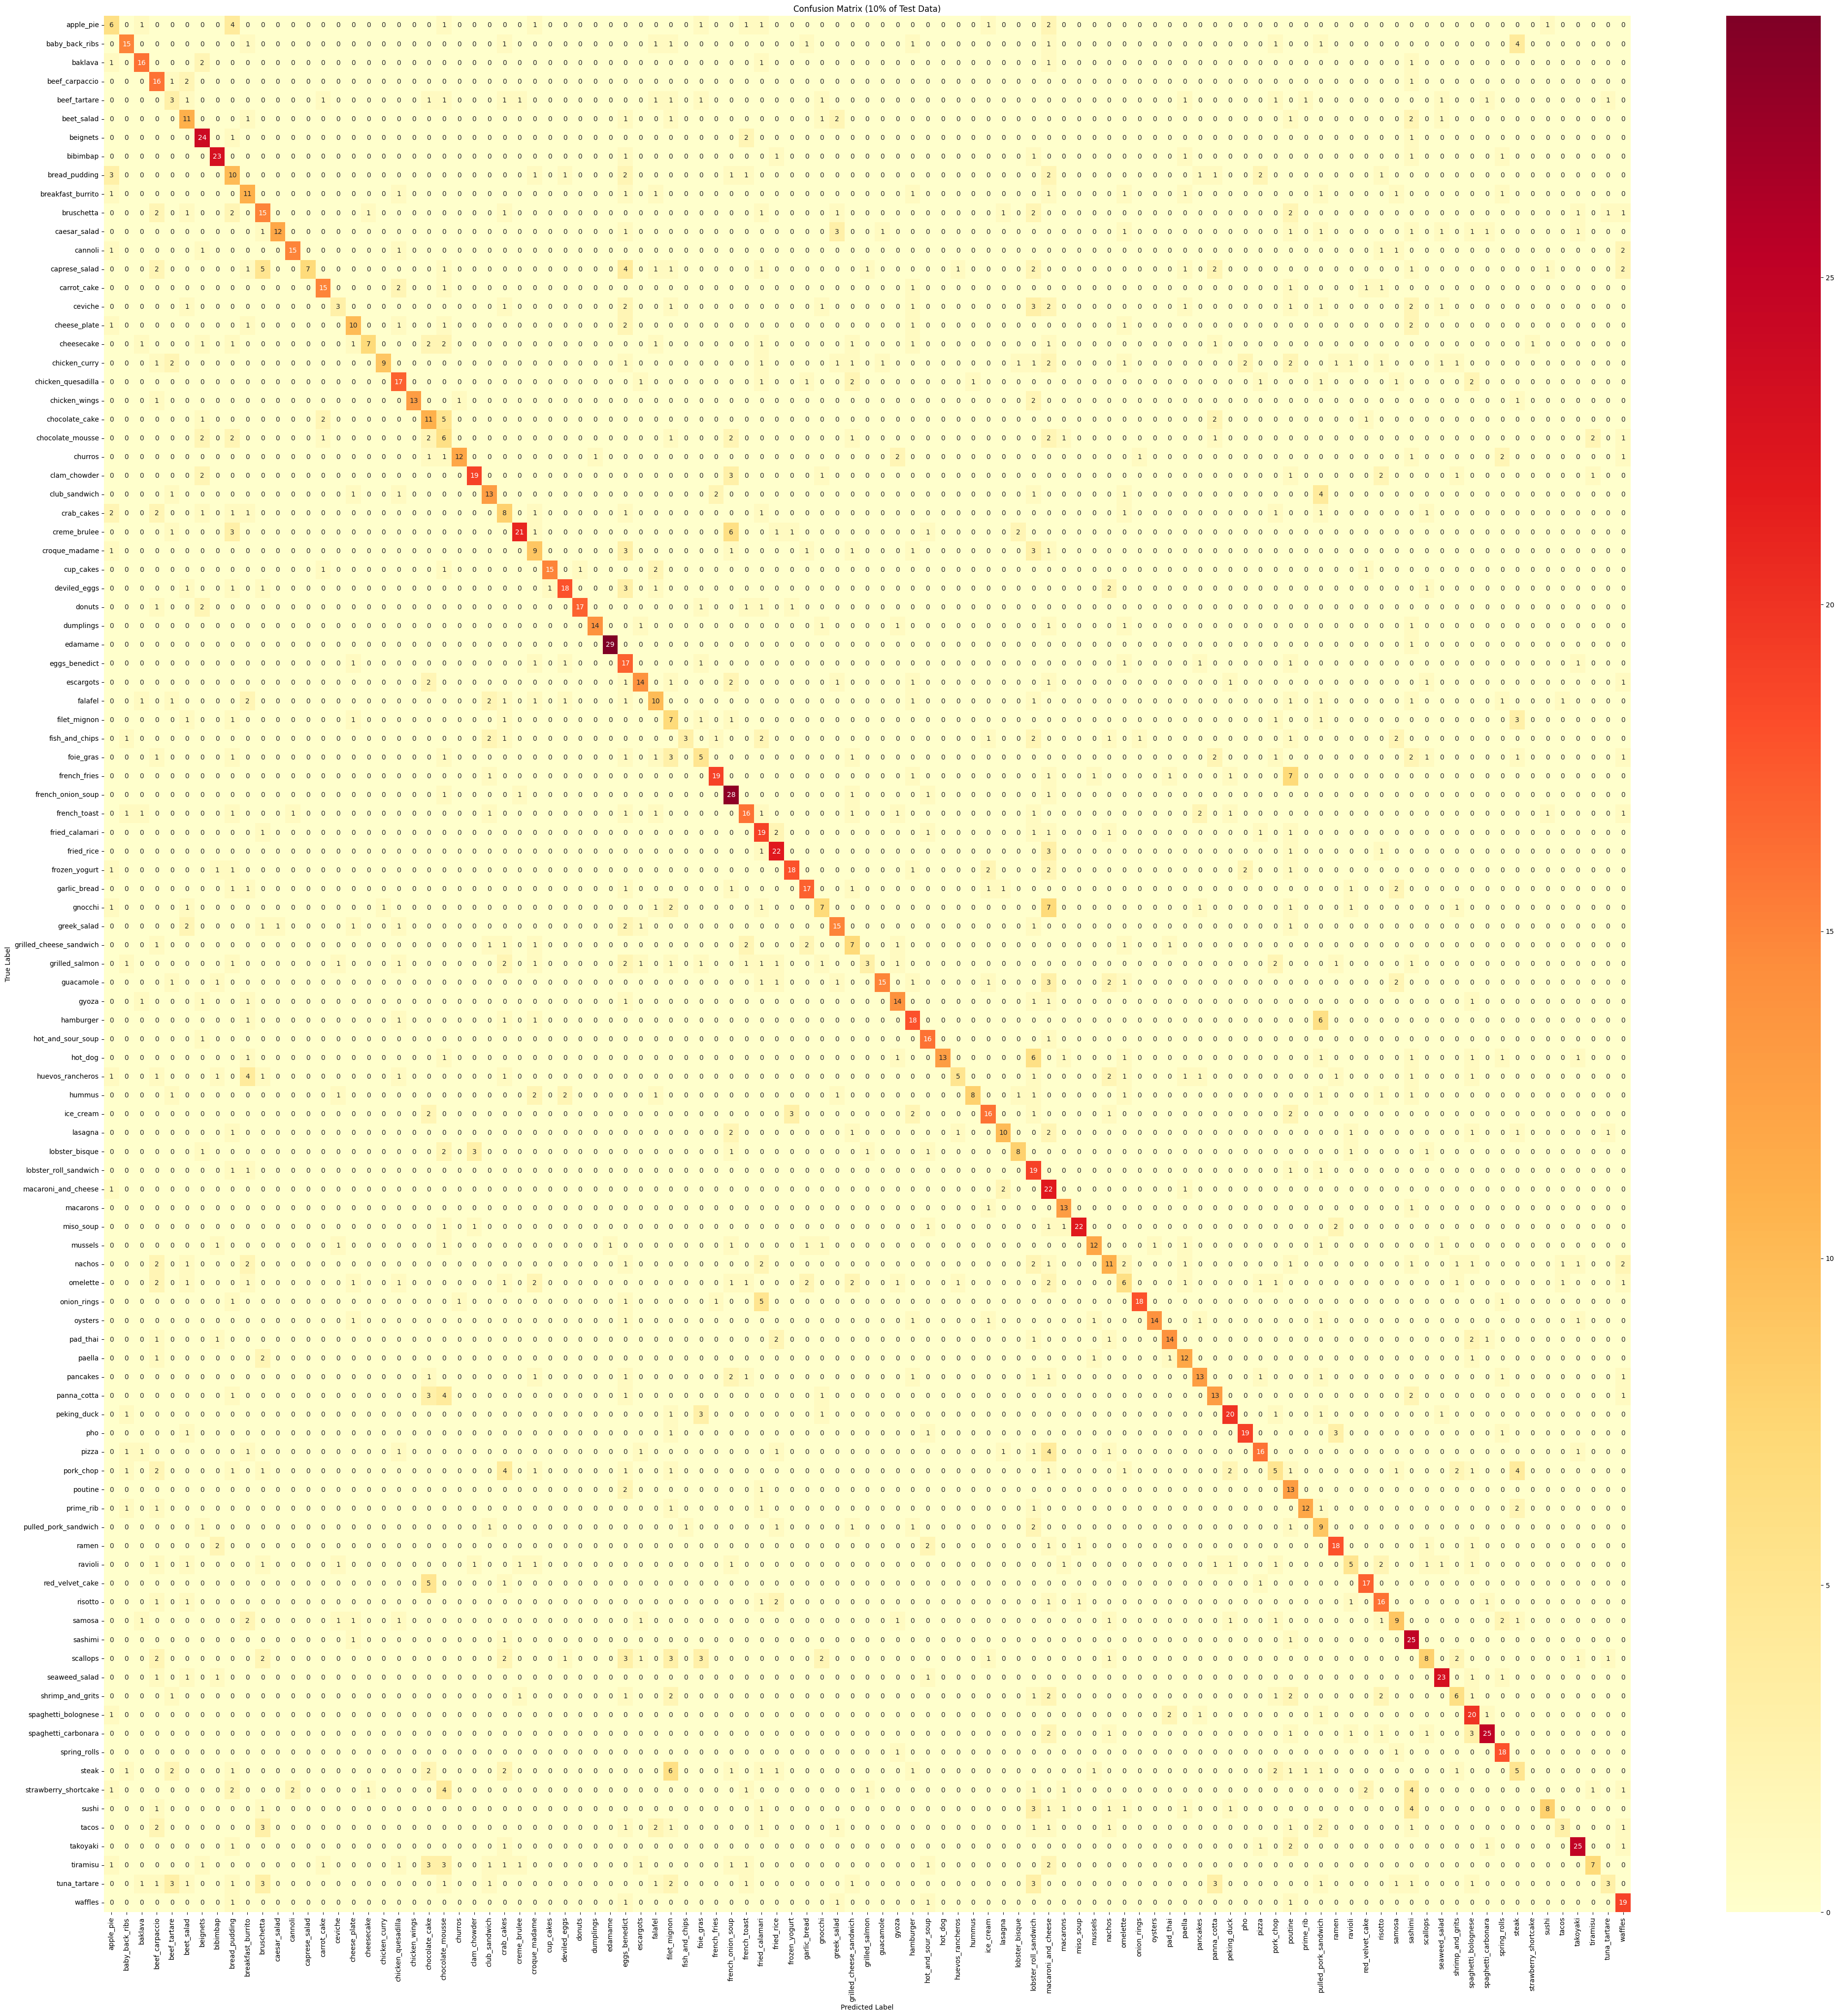

In [ ]:
# Create confusion matrix for the subset
conf_mat = confusion_matrix(y_true, y_pred)

# Plot confusion matrix
plt.figure(figsize=(50, 50))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='YlOrRd', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix (10% of Test Data)')
plt.show()


In [ ]:
# Generate classification report
class_report = classification_report(y_true, y_pred, target_names=class_names)
print("Classification Report:\n", class_report)


Classification Report:
                          precision    recall  f1-score   support

              apple_pie       0.26      0.30      0.28        20
         baby_back_ribs       0.65      0.54      0.59        28
                baklava       0.67      0.73      0.70        22
         beef_carpaccio       0.35      0.80      0.48        20
           beef_tartare       0.18      0.16      0.17        19
             beet_salad       0.39      0.52      0.45        21
               beignets       0.59      0.86      0.70        28
               bibimbap       0.74      0.79      0.77        29
          bread_pudding       0.24      0.38      0.29        26
      breakfast_burrito       0.33      0.50      0.40        22
             bruschetta       0.39      0.47      0.43        32
           caesar_salad       0.92      0.46      0.62        26
                cannoli       0.83      0.68      0.75        22
          caprese_salad       1.00      0.21      0.34        34
